In [ ]:
pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Face detection in OpenCV

[INFO] Found 3 Faces.


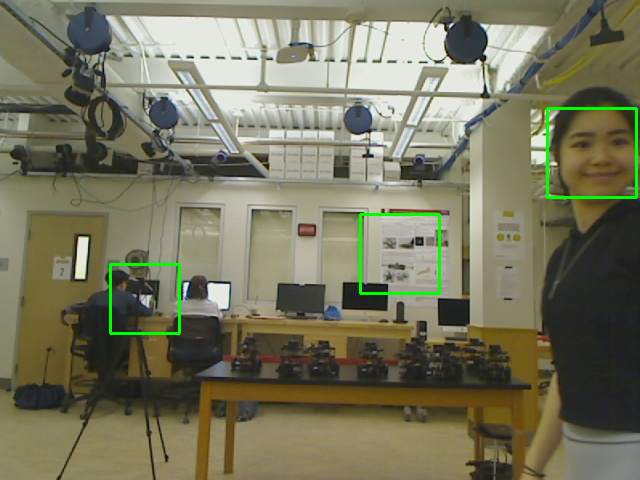

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt



# Load the cascade
faceCascade = cv2.CascadeClassifier('/content/drive/MyDrive/2021_Zhebin_CSThesis/Coding/haarcascade_frontalface_default.xml')
# Read the input image

#img = cv2.imread('/content/drive/MyDrive/2021_Zhebin_CSThesis/Real_Time_Image/1m/happy/201635187653_.pic.jpg')
img = cv2.imread('/content/drive/MyDrive/2021_Zhebin_CSThesis/Experiment_data/target3_exp1/happy/Feb22_Target1_emotion100.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)
print("[INFO] Found {0} Faces.".format(len(faces)))
# img2 = img.copy()
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) # green color rectangle
    # cropped = img2[y:y + h, x:x + w]
# Display the output
cv2.startWindowThread()
cv2_imshow(img)

# print('extracted image shape is:', cropped.shape)

# cv2.waitKey()



In [ ]:
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras

#load trained model
Irene_final_model_path = '/content/drive/My Drive/2021_Zhebin_CSThesis/Coding/Irene_RT5_200_Final.hdf'   # irene's model
Susy_final_model_path = '/content/drive/MyDrive/2021_Zhebin_CSThesis/Coding/susy_my_model.h5'   # susy's model

new_model = load_model(Irene_final_model_path)



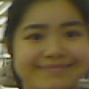

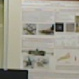

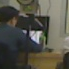

In [19]:


# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/2021_Zhebin_CSThesis/Coding/haarcascade_frontalface_default.xml')


def face_detection(input_image_path):
  '''
  extract face in the images.
  '''
  img = cv2.imread(input_image_path)

  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Detect faces
  faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
  )
  img2 = img.copy()

  # Draw rectangle around the faces
  # extract the faces
  extracted_face = []
  
  # choose the biggest rectangle to store
  #if len(faces) > 1:
  #  lengthOfRec = 0
  #  for (x,y,w,h) in faces:
  #    if lengthOfRec < w:
  #      lengthOfRec = w
  
  
  for (x, y, w, h) in faces:
    #if w == lengthOfRec:
      cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) # green color rectangle
      cropped = img2[y:y + h, x:x + w]
      extracted_face.append(cropped)

  return extracted_face

extracted_image = face_detection('/content/drive/MyDrive/2021_Zhebin_CSThesis/Experiment_data/target3_exp1/happy/Feb22_Target1_emotion100.jpg')

for i in range(len(extracted_image)):
  cv2_imshow(extracted_image[i])
  
  #cv2.imwrite('/content/drive/MyDrive/2021_Zhebin_CSThesis/Real_Time_Image/extracted_image/sample_output.jpg', )
  cv2.imwrite('/content/drive/MyDrive/2021_Zhebin_CSThesis/Experiment_data/test_and_show/test'+str(i)+'.jpg', extracted_image[i])


